Importing Pandas and Hvplot 

In [104]:
pip install geopandas matplotlib

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.10.0.tar.gz (281 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyogrio: filename=pyogrio-0.10.0-cp312-cp312-macosx_10_13_universal2.whl size=1016983 sha256=e90de2d79cb9c0bbcccaa39b6ef05b6df60ce24993a4981f7415cc0a65de4bad
  Stored in directory: /Users/jsflora/Library/Caches/pip/wheels/59/c1/88/e3278fb8f1b98210cd4fb43448a3e424b3fc93bd84fa9917dd
Successfully built pyogrio
Note: you may need to restart the kernel to use updated packages.


In [196]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
from pathlib import Path
import requests
import json
import hvplot.pandas
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from sklearn.linear_model import LinearRegression

Vaccinations Analysis 

In [2]:
file_path = Path("Resources/vaccination-data.csv")
vaccine_data = pd.read_csv(file_path)
vaccine_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,12/29/23,217124.0,90493.0,203.0,85.0,84363.0,79.0,NaN,2/17/21,NaN,35659.0,33.0
1,Afghanistan,AFG,EMRO,REPORTING,12/31/23,23000000.0,19200000.0,59.0,49.0,18400000.0,47.0,NaN,2/22/21,NaN,2729940.0,7.0
2,Angola,AGO,AFRO,REPORTING,12/31/23,27800000.0,16600000.0,85.0,50.0,9609080.0,29.0,NaN,3/10/21,NaN,3067091.0,9.0
3,Anguilla,AIA,AMRO,REPORTING,12/29/23,24864.0,10858.0,166.0,72.0,10382.0,69.0,NaN,2/5/21,NaN,3231.0,22.0
4,Albania,ALB,EURO,REPORTING,12/23/23,3088966.0,1349255.0,107.0,47.0,1279333.0,44.0,NaN,1/13/21,NaN,402371.0,14.0


Creating a clean DataFrame

In [3]:

data = vaccine_data
columns_to_exclude = ["TOTAL_VACCINATIONS","PERSONS_VACCINATED_1PLUS_DOSE","PERSONS_LAST_DOSE","PERSONS_LAST_DOSE_PER100","VACCINES_USED","NUMBER_VACCINES_TYPES_USED","PERSONS_BOOSTER_ADD_DOSE"]
df_filtered = data.drop(columns =columns_to_exclude)
df_filtered

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,FIRST_VACCINE_DATE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,12/29/23,203.0,85.0,2/17/21,33.0
1,Afghanistan,AFG,EMRO,REPORTING,12/31/23,59.0,49.0,2/22/21,7.0
2,Angola,AGO,AFRO,REPORTING,12/31/23,85.0,50.0,3/10/21,9.0
3,Anguilla,AIA,AMRO,REPORTING,12/29/23,166.0,72.0,2/5/21,22.0
4,Albania,ALB,EURO,REPORTING,12/23/23,107.0,47.0,1/13/21,14.0
...,...,...,...,...,...,...,...,...,...
210,"Taiwan, China",TWN,NaN,REPORTING,NaN,NaN,NaN,NaN,NaN
211,Viet Nam,VNM,WPRO,REPORTING,6/30/23,274.0,93.0,3/8/21,60.0
212,Vanuatu,VUT,WPRO,REPORTING,2/20/23,116.0,58.0,6/2/21,5.0
213,Wallis and Futuna,WLF,WPRO,REPORTING,1/23/23,154.0,64.0,3/19/21,30.0


In [4]:
file_path = Path("Resources/output_countries_list_who_referential.csv")
region_data = pd.read_csv(file_path)
region_data.head()

,Unnamed: 0,id,iso2Code,name,region,capitalCity,longitude,latitude
0,0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.5167
1,1,AFE,ZH,Africa Eastern and Southern,Aggregates,NaN,NaN,NaN
2,2,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.5228
3,3,AFR,A9,Africa,Aggregates,NaN,NaN,NaN
4,4,AFW,ZI,Africa Western and Central,Aggregates,NaN,NaN,NaN


In [5]:
vaccine_merged_data = pd.merge(df_filtered,region_data,left_on="ISO3",right_on ="id",how="left")
vaccine_merged_data

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,FIRST_VACCINE_DATE,PERSONS_BOOSTER_ADD_DOSE_PER100,Unnamed: 0,id,iso2Code,name,region,capitalCity,longitude,latitude
0,Aruba,ABW,AMRO,REPORTING,12/29/23,203.0,85.0,2/17/21,33.0,0.0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.51670
1,Afghanistan,AFG,EMRO,REPORTING,12/31/23,59.0,49.0,2/22/21,7.0,2.0,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.52280
2,Angola,AGO,AFRO,REPORTING,12/31/23,85.0,50.0,3/10/21,9.0,5.0,AGO,AO,Angola,Sub-Saharan Africa,Luanda,13.2420,-8.81155
3,Anguilla,AIA,AMRO,REPORTING,12/29/23,166.0,72.0,2/5/21,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,EURO,REPORTING,12/23/23,107.0,47.0,1/13/21,14.0,6.0,ALB,AL,Albania,Europe & Central Asia,Tirane,19.8172,41.33170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,"Taiwan, China",TWN,NaN,REPORTING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,Viet Nam,VNM,WPRO,REPORTING,6/30/23,274.0,93.0,3/8/21,60.0,286.0,VNM,VN,Viet Nam,East Asia & Pacific,Hanoi,105.8250,21.00690
212,Vanuatu,VUT,WPRO,REPORTING,2/20/23,116.0,58.0,6/2/21,5.0,287.0,VUT,VU,Vanuatu,East Asia & Pacific,Port-Vila,168.3210,-17.74040
213,Wallis and Futuna,WLF,WPRO,REPORTING,1/23/23,154.0,64.0,3/19/21,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

vaccine_merged_data.columns = vaccine_merged_data.columns.str.strip()
vaccine_clean_df = vaccine_merged_data[["COUNTRY","WHO_REGION","region", "longitude","latitude","TOTAL_VACCINATIONS_PER100","PERSONS_VACCINATED_1PLUS_DOSE_PER100","PERSONS_BOOSTER_ADD_DOSE_PER100"]]
vaccine_clean_df = vaccine_clean_df.rename(columns={
    "TOTAL_VACCINATIONS_PER100": "total vaccinations per 100",
    "PERSONS_VACCINATED_1PLUS_DOSE_PER100": "number of people vaccinated after first dose per 100",
    "PERSONS_BOOSTER_ADD_DOSE_PER100": "number of people vaccinated after booster per 100"
})
vaccine_clean_df

,COUNTRY,WHO_REGION,region,longitude,latitude,total vaccinations per 100,number of people vaccinated after first dose per 100,number of people vaccinated after booster per 100
0,Aruba,AMRO,Latin America & Caribbean,-70.0167,12.51670,203.0,85.0,33.0
1,Afghanistan,EMRO,South Asia,69.1761,34.52280,59.0,49.0,7.0
2,Angola,AFRO,Sub-Saharan Africa,13.2420,-8.81155,85.0,50.0,9.0
3,Anguilla,AMRO,NaN,NaN,NaN,166.0,72.0,22.0
4,Albania,EURO,Europe & Central Asia,19.8172,41.33170,107.0,47.0,14.0
...,...,...,...,...,...,...,...,...
210,"Taiwan, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,Viet Nam,WPRO,East Asia & Pacific,105.8250,21.00690,274.0,93.0,60.0
212,Vanuatu,WPRO,East Asia & Pacific,168.3210,-17.74040,116.0,58.0,5.0
213,Wallis and Futuna,WPRO,NaN,NaN,NaN,154.0,64.0,30.0


First Dose 

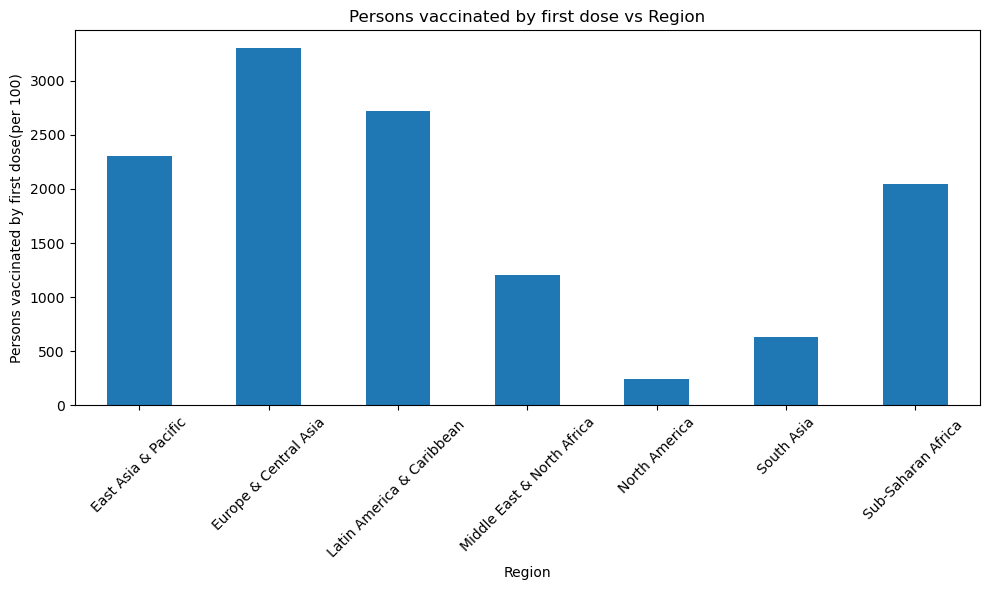

In [7]:
df_grouped = vaccine_clean_df.groupby("region").sum()


plt.figure(figsize=(10, 6))
df_grouped["number of people vaccinated after first dose per 100"].plot(kind='bar')

plt.title('Persons vaccinated by first dose vs Region')
plt.xlabel('Region')
plt.ylabel('Persons vaccinated by first dose(per 100)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("People_vaccinated with the first dose.png")
plt.show()

Booster Shot

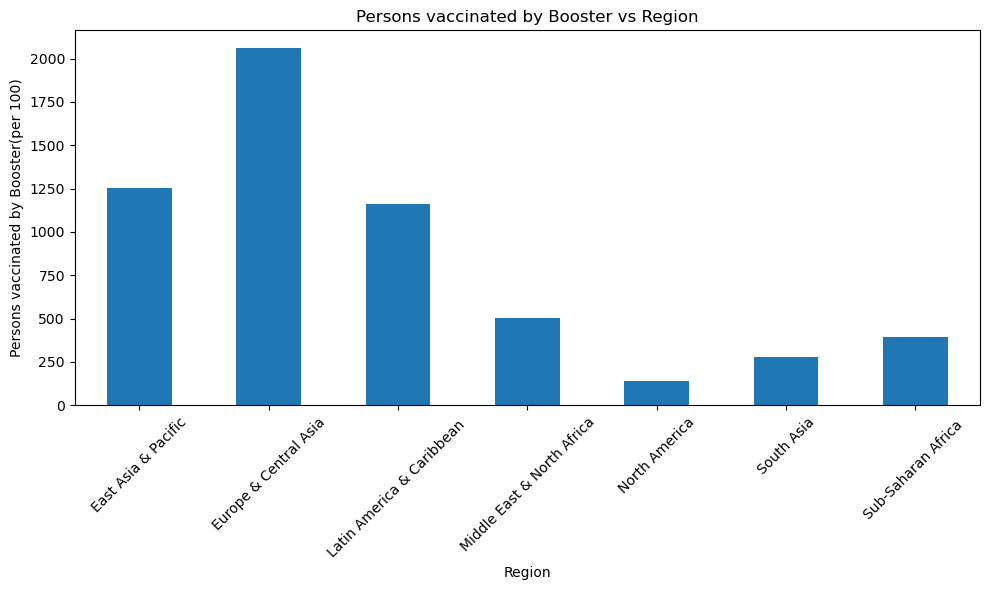

In [8]:
df_grouped = vaccine_clean_df.groupby("region").sum()


plt.figure(figsize=(10, 6))
df_grouped["number of people vaccinated after booster per 100"].plot(kind='bar')

plt.title('Persons vaccinated by Booster vs Region')
plt.xlabel('Region')
plt.ylabel('Persons vaccinated by Booster(per 100)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("People_Vaccinated with booster.png")
plt.show()

CPI Dataset(2021 to 2022)

In [14]:
file_path = Path("Resources/CPI rates.csv")
CPI_data = pd.read_csv(file_path)
CPI_data.head()

,Series Name,Series Code,COUNTRY,Country Code,1990 [YR1990],2000 [YR2000],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Consumer price index (2010 = 100),FP.CPI.TOTL,Afghanistan,AFG,..,..,133.7683667,132.8832092,138.7086655,145.6107414,146.5224819,149.8959752,..,..,..,..
1,Consumer price index (2010 = 100),FP.CPI.TOTL,Albania,ALB,..,74.13822455,109.3241873,111.3971641,112.8179589,115.0592696,117.3927402,119.0492584,120.9789119,123.448662,131.7508348,..
2,Consumer price index (2010 = 100),FP.CPI.TOTL,Algeria,DZA,15.51936355,70.438128,120.9498642,126.7366464,134.8448702,142.3842032,148.4639947,151.3616678,155.0172502,166.2188945,181.619932,198.5508576
3,Consumer price index (2010 = 100),FP.CPI.TOTL,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,Consumer price index (2010 = 100),FP.CPI.TOTL,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..


In [15]:
CPI_data = CPI_data.set_index(["Series Name", "COUNTRY","2020 [YR2020]","2022 [YR2022]"])
columns_to_keep = [col for col in CPI_data.columns if col.isdigit() and int(col) >= 2019]
filtered_dataframe = CPI_data[columns_to_keep]
filtered_dataframe
#begining of the economy(2019) and economy in 2022

Empty DataFrame
Columns: []
Index: [(Consumer price index (2010 = 100), Afghanistan, .., ..), (Consumer price index (2010 = 100), Albania, 120.9789119, 131.7508348), (Consumer price index (2010 = 100), Algeria, 155.0172502, 181.619932), (Consumer price index (2010 = 100), American Samoa, .., ..), (Consumer price index (2010 = 100), Andorra, .., ..), (Consumer price index (2010 = 100), Angola, 464.1398371, 708.3214356), (Consumer price index (2010 = 100), Antigua and Barbuda, 116.1592339, 127.4841094), (Consumer price index (2010 = 100), Argentina, .., ..), (Consumer price index (2010 = 100), Armenia, 130.7408917, 152.2433006), (Consumer price index (2010 = 100), Aruba, .., ..), (Consumer price index (2010 = 100), Australia, 120.8116545, 132.4661811), (Consumer price index (2010 = 100), Austria, 119.6894358, 133.5135657), (Consumer price index (2010 = 100), Azerbaijan, 161.2214726, 195.7611978), (Consumer price index (2010 = 100), Bahamas, The, 116.26368, 126.3474046), (Consumer price index (2010 = 100), Bahrain, 116.0193231, 119.4969305), (Consumer price index (2010 = 100), Bangladesh, 189.9055347, 215.8645866), (Consumer price index (2010 = 100), Barbados, .., 155.6488283), (Consumer price index (2010 = 100), Belarus, 536.5426883, 676.6277476), (Consumer price index (2010 = 100), Belgium, 117.9780019, 132.456219), (Consumer price index (2010 = 100), Belize, 106.2889974, 116.6156402), (Consumer price index (2010 = 100), Benin, 114.0667983, 117.6116916), (Consumer price index (2010 = 100), Bermuda, .., ..), (Consumer price index (2010 = 100), Bhutan, 179.5154093, 203.5709773), (Consumer price index (2010 = 100), Bolivia, 149.7128039, 153.4505182), (Consumer price index (2010 = 100), Bosnia and Herzegovina, .., ..), (Consumer price index (2010 = 100), Botswana, 152.5845815, 182.721938), (Consumer price index (2010 = 100), Brazil, 172.7742913, 204.4821206), (Consumer price index (2010 = 100), British Virgin Islands, .., ..), (Consumer price index (2010 = 100), Brunei Darussalam, 100.9482537, 106.479706), (Consumer price index (2010 = 100), Bulgaria, 116.3319732, 138.5844081), (Consumer price index (2010 = 100), Burkina Faso, 110.4009836, 130.7874822), (Consumer price index (2010 = 100), Burundi, 195.4449782, 251.7048788), (Consumer price index (2010 = 100), Cabo Verde, 111.1710206, 122.2222742), (Consumer price index (2010 = 100), Cambodia, 133.938838, 145.217175), (Consumer price index (2010 = 100), Cameroon, 121.5407767, 132.0679984), (Consumer price index (2010 = 100), Canada, 117.5944476, 129.8583286), (Consumer price index (2010 = 100), Cayman Islands, .., ..), (Consumer price index (2010 = 100), Central African Republic, 154.380848, 169.9429607), (Consumer price index (2010 = 100), Chad, 122.9524225, 129.0637113), (Consumer price index (2010 = 100), Channel Islands, .., ..), (Consumer price index (2010 = 100), Chile, 135.9309826, 158.6250269), (Consumer price index (2010 = 100), China, 128.1094436, 131.9193567), (Consumer price index (2010 = 100), Colombia, 144.5090874, 164.7808063), (Consumer price index (2010 = 100), Comoros, .., ..), (Consumer price index (2010 = 100), Congo, Dem. Rep., .., ..), (Consumer price index (2010 = 100), Congo, Rep., 126.9800514, 133.0894435), (Consumer price index (2010 = 100), Costa Rica, 129.7797609, 142.9447686), (Consumer price index (2010 = 100), Cote d'Ivoire, 114.3134544, 125.2692757), (Consumer price index (2010 = 100), Croatia, 109.9856836, 124.9552613), (Consumer price index (2010 = 100), Cuba, .., ..), (Consumer price index (2010 = 100), Curacao, .., ..), (Consumer price index (2010 = 100), Cyprus, 101.8565384, 113.1085615), (Consumer price index (2010 = 100), Czechia, 120.1576778, 143.6122559), (Consumer price index (2010 = 100), Denmark, 110.8115347, 121.5516472), (Consumer price index (2010 = 100), Djibouti, 122.3882717, 130.2492059), (Consumer price index (2010 = 100), Dominica, 104.6658585, 114.4826905), (Consumer price index (2010 = 100), Dominican Republic, 137.1697091, 161.5

In [16]:
file_path = Path("Resources/output_countries_list_who_referential.csv")
region_data = pd.read_csv(file_path)
region_data.head()

,Unnamed: 0,id,iso2Code,name,region,capitalCity,longitude,latitude
0,0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.5167
1,1,AFE,ZH,Africa Eastern and Southern,Aggregates,NaN,NaN,NaN
2,2,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.5228
3,3,AFR,A9,Africa,Aggregates,NaN,NaN,NaN
4,4,AFW,ZI,Africa Western and Central,Aggregates,NaN,NaN,NaN


In [20]:
CPI_merged_data = pd.merge(CPI_data,region_data,left_on="Country Code",right_on ="id",how="left")
print(CPI_merged_data.columns)
CPI_merged_data.columns = CPI_merged_data.columns.str.strip()
CPI_clean_df = CPI_merged_data[["name","id","region", "longitude","latitude","Series Code","2019 [YR2019]","2023 [YR2023]"]]
CPI_clean_df

Index(['Series Code', 'Country Code', '1990 [YR1990]', '2000 [YR2000]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2021 [YR2021]', '2023 [YR2023]',
       'Unnamed: 0', 'id', 'iso2Code', 'name', 'region', 'capitalCity',
       'longitude', 'latitude'],
      dtype='object')


,name,id,region,longitude,latitude,Series Code,2019 [YR2019],2023 [YR2023]
0,Afghanistan,AFG,South Asia,69.17610,34.5228,FP.CPI.TOTL,149.8959752,..
1,Albania,ALB,Europe & Central Asia,19.81720,41.3317,FP.CPI.TOTL,119.0492584,..
2,Algeria,DZA,Middle East & North Africa,3.05097,36.7397,FP.CPI.TOTL,151.3616678,198.5508576
3,American Samoa,ASM,East Asia & Pacific,-170.69100,-14.2846,FP.CPI.TOTL,..,..
4,Andorra,AND,Europe & Central Asia,1.52180,42.5075,FP.CPI.TOTL,..,..
...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CPI vs Region

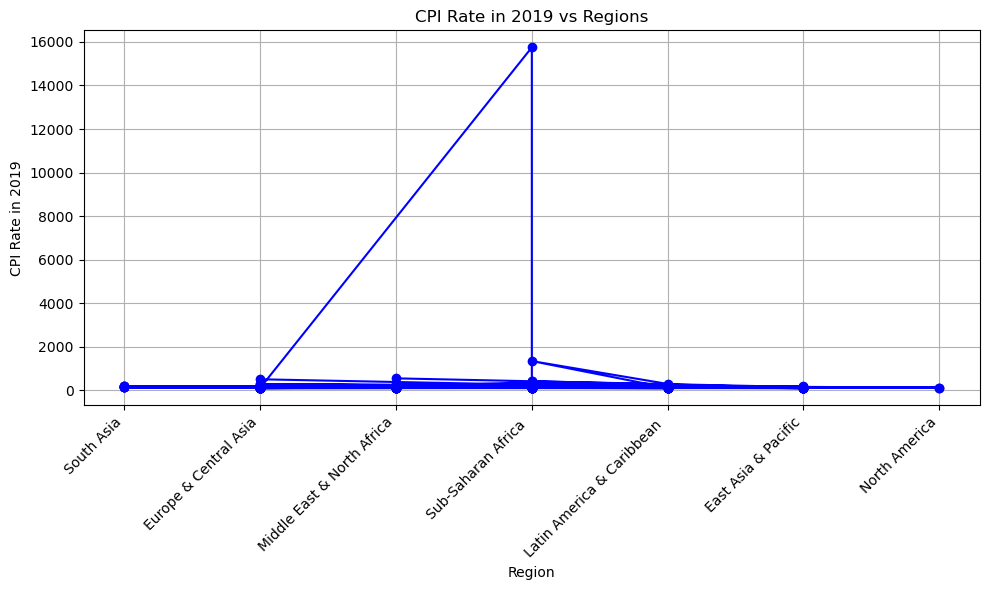

In [21]:
data=CPI_clean_df
df = pd.DataFrame(data)
df['2019 [YR2019]'] = pd.to_numeric(df['2019 [YR2019]'], errors='coerce')  # Convert to numeric, coerce errors to NaN
df = df.dropna(subset=['2019 [YR2019]'])  # Drop rows where CPI_2019 is NaN

# Ensure all region values are strings
df['region'] = df['region'].astype(str)

# Plotting a line graph: CPI rates in 2019 vs regions
plt.figure(figsize=(10, 6))
plt.plot(df['region'], df['2019 [YR2019]'], marker='o', linestyle='-', color='b')

# Adding plot labels and title
plt.xlabel('Region')
plt.ylabel('CPI Rate in 2019')
plt.title('CPI Rate in 2019 vs Regions')
plt.grid(True)

# Displaying the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig("CPI_Rate_in_2019.png")
plt.show()



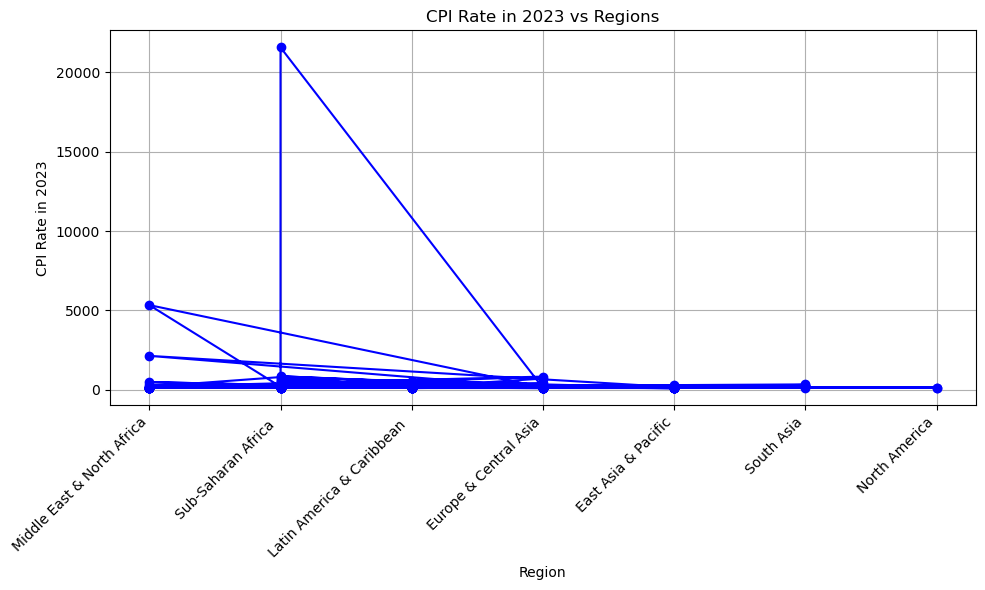

In [22]:
data=CPI_clean_df
df = pd.DataFrame(data)
df['2023 [YR2023]'] = pd.to_numeric(df['2023 [YR2023]'], errors='coerce')  # Convert to numeric, coerce errors to NaN
df = df.dropna(subset=['2023 [YR2023]'])  # Drop rows where CPI_2019 is NaN

# Ensure all region values are strings
df['region'] = df['region'].astype(str)

# Plotting a line graph: CPI rates in 2019 vs regions
plt.figure(figsize=(10, 6))
plt.plot(df['region'], df['2023 [YR2023]'], marker='o', linestyle='-', color='b')

# Adding plot labels and title
plt.xlabel('Region')
plt.ylabel('CPI Rate in 2023')
plt.title('CPI Rate in 2023 vs Regions')
plt.grid(True)

# Displaying the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig("CPI_Rate_in_2023.png")
plt.show()

In [62]:
data = pd.DataFrame({
    "region": CPI_clean_df["region"],
    "latitude": CPI_clean_df["latitude"],
    "longitude": CPI_clean_df["longitude"],
    "CPI_2019": pd.to_numeric(CPI_clean_df["2019 [YR2019]"], errors='coerce')  # Convert to numeric
})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     266 non-null    object 
 1   latitude   211 non-null    float64
 2   longitude  211 non-null    float64
 3   CPI_2019   178 non-null    float64
dtypes: float64(3), object(1)
memory usage: 8.6+ KB


GDP(2021 and 2022)

In [48]:
file_path = Path("Resources/GDP.csv")
GDP_data = pd.read_csv(file_path)
GDP_data.head()

,Series Name,Series Code,COUNTRY,Country Code,1990 [YR1990],2000 [YR2000],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,180.1883694,626.5129291,566.8811297,523.053012,526.140801,492.090631,497.7414313,512.055098,355.7778264,352.6037331,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,617.2304355,1126.68334,4578.633208,3952.803574,4124.05539,4531.032207,5287.660801,5396.214243,5343.037704,6377.203096,6810.114041,8367.775731
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,2431.55136,1780.376063,6164.644699,4741.49977,4481.081962,4615.868744,4640.314145,4530.101745,3794.409524,4216.251285,5023.252932,5260.20625
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..,..,12313.99736,13101.54182,13300.82461,12372.88478,13195.9359,13672.57666,15609.77722,16653.71378,19673.3901,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,19208.67838,21674.29972,45680.53499,38885.53032,39931.21698,40632.23155,42904.82846,41328.6005,37207.222,42066.49052,42350.69707,46544.72072


In [49]:
GDP_data = GDP_data.set_index(["Series Name","COUNTRY","2019 [YR2019]","2023 [YR2023]"])
columns_to_keep = [col for col in GDP_data.columns if col.isdigit() and int(col) >= 2019]
filtered_dataframe_GDP = GDP_data[columns_to_keep]
filtered_dataframe_GDP

Empty DataFrame
Columns: []
Index: [(GDP per capita (current US$), Afghanistan, 497.7414313, ..), (GDP per capita (current US$), Albania, 5396.214243, 8367.775731), (GDP per capita (current US$), Algeria, 4530.101745, 5260.20625), (GDP per capita (current US$), American Samoa, 13672.57666, ..), (GDP per capita (current US$), Andorra, 41328.6005, 46544.72072), (GDP per capita (current US$), Angola, 2191.347764, 2309.52162), (GDP per capita (current US$), Antigua and Barbuda, 18730.0048, 21560.21533), (GDP per capita (current US$), Argentina, 9963.674162, 13730.51471), (GDP per capita (current US$), Armenia, 4828.504886, 8715.765336), (GDP per capita (current US$), Aruba, 31902.80982, ..), (GDP per capita (current US$), Australia, 55049.57192, 64711.7656), (GDP per capita (current US$), Austria, 50067.58573, 56505.96828), (GDP per capita (current US$), Azerbaijan, 4805.753718, 7155.083604), (GDP per capita (current US$), Bahamas, The, 32173.95818, 34749.63829), (GDP per capita (current US$), Bahrain, 25869.11291, 29084.30713), (GDP per capita (current US$), Bangladesh, 2122.037652, 2529.080127), (GDP per capita (current US$), Barbados, 19156.03987, 22672.61544), (GDP per capita (current US$), Belarus, 6837.768321, 7829.053137), (GDP per capita (current US$), Belgium, 46641.7214, 53475.2935), (GDP per capita (current US$), Belize, 6134.215233, 7987.585955), (GDP per capita (current US$), Benin, 1170.885995, 1434.662834), (GDP per capita (current US$), Bermuda, 116153.1661, ..), (GDP per capita (current US$), Bhutan, 3564.598771, ..), (GDP per capita (current US$), Bolivia, 3472.380831, 3700.978338), (GDP per capita (current US$), Bosnia and Herzegovina, 6094.724823, 8426.09111), (GDP per capita (current US$), Botswana, 6691.160846, 7249.799326), (GDP per capita (current US$), Brazil, 8845.324149, 10043.62392), (GDP per capita (current US$), British Virgin Islands, .., ..), (GDP per capita (current US$), Brunei Darussalam, 30748.30924, 33430.91848), (GDP per capita (current US$), Bulgaria, 9874.336326, 15797.59558), (GDP per capita (current US$), Burkina Faso, 765.2295604, 874.1212804), (GDP per capita (current US$), Burundi, 216.9729709, 199.5807602), (GDP per capita (current US$), Cabo Verde, 3903.050317, 4321.579864), (GDP per capita (current US$), Cambodia, 1671.3854, 1875.071482), (GDP per capita (current US$), Cameroon, 1538.563063, 1673.648889), (GDP per capita (current US$), Canada, 46352.86934, 53371.69743), (GDP per capita (current US$), Cayman Islands, 89846.3211, ..), (GDP per capita (current US$), Central African Republic, 426.4087531, 445.028196), (GDP per capita (current US$), Chad, 701.621201, 719.3848752), (GDP per capita (current US$), Channel Islands, 58564.3501, ..), (GDP per capita (current US$), Chile, 14616.20725, 17093.24197), (GDP per capita (current US$), China, 10143.86022, 12614.06099), (GDP per capita (current US$), Colombia, 6436.509215, 6979.725135), (GDP per capita (current US$), Comoros, 1510.797324, 1587.161896), (GDP per capita (current US$), Congo, Dem. Rep., 575.8827814, 649.1439879), (GDP per capita (current US$), Congo, Rep., 2508.940444, 2508.823395), (GDP per capita (current US$), Costa Rica, 12669.34115, 16595.37038), (GDP per capita (current US$), Cote d'Ivoire, 2309.313583, 2728.803246), (GDP per capita (current US$), Croatia, 15218.5258, 21459.78478), (GDP per capita (current US$), Cuba, 9139.38051, ..), (GDP per capita (current US$), Curacao, 19220.6867, ..), (GDP per capita (current US$), Cyprus, 29419.99219, 34701.44141), (GDP per capita (current US$), Czechia, 23664.84786, 30427.42347), (GDP per capita (current US$), Denmark, 59592.98069, 67967.38187), (GDP per capita (current US$), Djibouti, 2876.043664, 3606.416896), (GDP per capita (current US$), Dominica, 8561.587011, 8953.896394), (GDP per capita (current US$), Dominican Republic, 8173.344699, 10716.01336), (GDP per capita (current US$), Ecuador, 6203.727051, 6533.351504), (GDP per capita (current US$), Egypt, Arab Rep., 3017.2

In [52]:
file_path = Path("Resources/output_countries_list_who_referential.csv")
region_data = pd.read_csv(file_path)
region_data.head()

,Unnamed: 0,id,iso2Code,name,region,capitalCity,longitude,latitude
0,0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.5167
1,1,AFE,ZH,Africa Eastern and Southern,Aggregates,NaN,NaN,NaN
2,2,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.5228
3,3,AFR,A9,Africa,Aggregates,NaN,NaN,NaN
4,4,AFW,ZI,Africa Western and Central,Aggregates,NaN,NaN,NaN


In [66]:
GDP_merged_data = pd.merge(GDP_data,region_data,left_on="Country Code",right_on ="id",how="left")
GDP_merged_data


,Series Code,Country Code,1990 [YR1990],2000 [YR2000],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2020 [YR2020],2021 [YR2021],2022 [YR2022],Unnamed: 0,id,iso2Code,name,region,capitalCity,longitude,latitude
0,NY.GDP.PCAP.CD,AFG,..,180.1883694,626.5129291,566.8811297,523.053012,526.140801,492.090631,512.055098,355.7778264,352.6037331,2.0,AFG,AF,Afghanistan,South Asia,Kabul,69.17610,34.5228
1,NY.GDP.PCAP.CD,ALB,617.2304355,1126.68334,4578.633208,3952.803574,4124.05539,4531.032207,5287.660801,5343.037704,6377.203096,6810.114041,6.0,ALB,AL,Albania,Europe & Central Asia,Tirane,19.81720,41.3317
2,NY.GDP.PCAP.CD,DZA,2431.55136,1780.376063,6164.644699,4741.49977,4481.081962,4615.868744,4640.314145,3794.409524,4216.251285,5023.252932,81.0,DZA,DZ,Algeria,Middle East & North Africa,Algiers,3.05097,36.7397
3,NY.GDP.PCAP.CD,ASM,..,..,12313.99736,13101.54182,13300.82461,12372.88478,13195.9359,15609.77722,16653.71378,19673.3901,12.0,ASM,AS,American Samoa,East Asia & Pacific,Pago Pago,-170.69100,-14.2846
4,NY.GDP.PCAP.CD,AND,19208.67838,21674.29972,45680.53499,38885.53032,39931.21698,40632.23155,42904.82846,37207.222,42066.49052,42350.69707,7.0,AND,AD,Andorra,Europe & Central Asia,Andorra la Vella,1.52180,42.5075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
GDP_merged_data.columns = GDP_merged_data.columns.str.strip()
GDP_clean_df = GDP_merged_data[["name","id","region", "longitude","latitude","Series Code","2020 [YR2020]","2022 [YR2022]"]]
GDP_clean_df

,name,id,region,longitude,latitude,Series Code,2020 [YR2020],2022 [YR2022]
0,Afghanistan,AFG,South Asia,69.17610,34.5228,NY.GDP.PCAP.CD,512.055098,352.6037331
1,Albania,ALB,Europe & Central Asia,19.81720,41.3317,NY.GDP.PCAP.CD,5343.037704,6810.114041
2,Algeria,DZA,Middle East & North Africa,3.05097,36.7397,NY.GDP.PCAP.CD,3794.409524,5023.252932
3,American Samoa,ASM,East Asia & Pacific,-170.69100,-14.2846,NY.GDP.PCAP.CD,15609.77722,19673.3901
4,Andorra,AND,Europe & Central Asia,1.52180,42.5075,NY.GDP.PCAP.CD,37207.222,42350.69707
...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


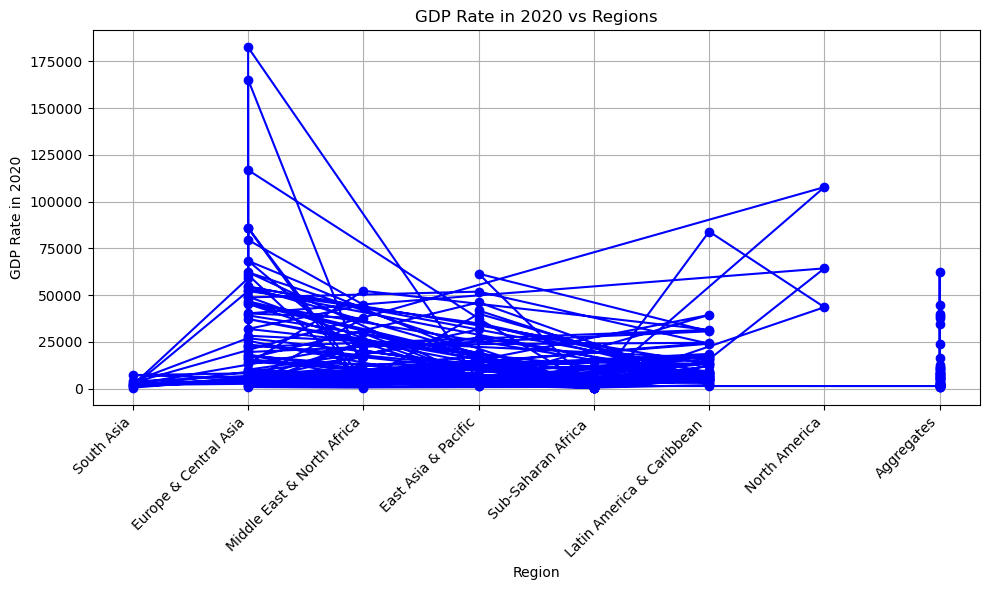

In [82]:
data=GDP_clean_df
df = pd.DataFrame(data)
df['2020 [YR2020]'] = pd.to_numeric(df['2020 [YR2020]'], errors='coerce')  
df = df.dropna(subset=['2020 [YR2020]']) 

# Ensure all region values are strings
df['region'] = df['region'].astype(str)

# Plotting a line graph: CPI rates in 2019 vs regions
plt.figure(figsize=(10, 6))
plt.plot(df['region'], df['2020 [YR2020]'], marker='o', linestyle='-', color='b')

# Adding plot labels and title
plt.xlabel('Region')
plt.ylabel('GDP Rate in 2020')
plt.title('GDP Rate in 2020 vs Regions')
plt.grid(True)

# Displaying the plot
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.savefig("GDP_Rate_in_2020.png")
plt.show()

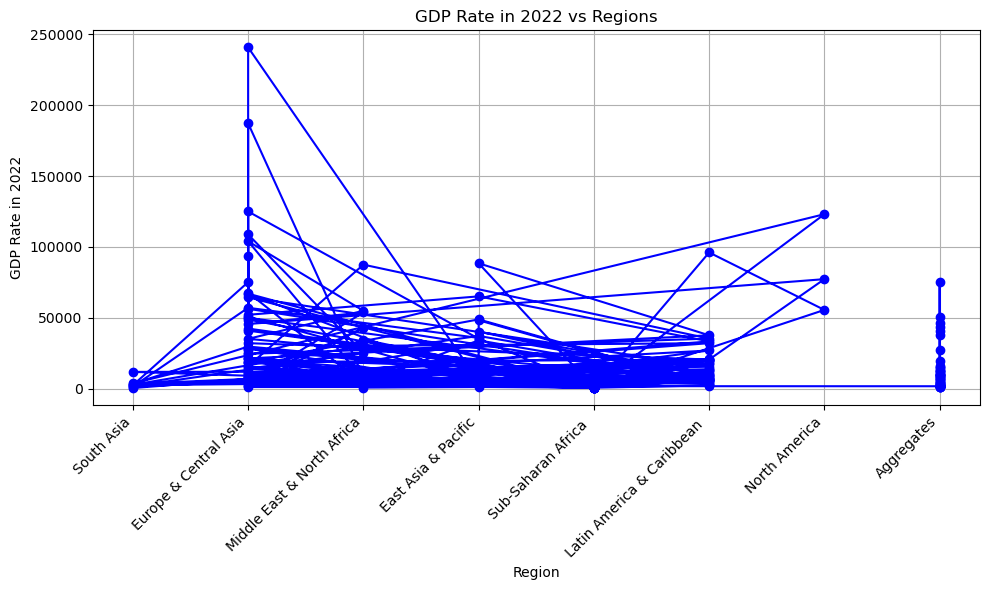

In [83]:
data=GDP_clean_df
df = pd.DataFrame(data)
df['2022 [YR2022]'] = pd.to_numeric(df['2022 [YR2022]'], errors='coerce')  # Convert to numeric, coerce errors to NaN
df = df.dropna(subset=['2022 [YR2022]'])  # Drop rows where CPI_2019 is NaN

# Ensure all region values are strings
df['region'] = df['region'].astype(str)

# Plotting a line graph: CPI rates in 2019 vs regions
plt.figure(figsize=(10, 6))
plt.plot(df['region'], df['2022 [YR2022]'], marker='o', linestyle='-', color='b')

# Adding plot labels and title
plt.xlabel('Region')
plt.ylabel('GDP Rate in 2022')
plt.title('GDP Rate in 2022 vs Regions')
plt.grid(True)

# Displaying the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig("GDP_Rate_in_2022.png")
plt.show()